In [1]:
import pandas
import pickle
import os
import string
import itertools
from IPython.display import display
from biotite.sequence.phylo import upgma
from matplotlib import pyplot
from io import StringIO
from Bio import Phylo
from ete3 import Tree

In [2]:
data_path = "../../../data"

In [3]:
df = pandas.read_csv(f"{data_path}/final_cluster_with_indelible.csv")

In [4]:
df.describe()

,Right,Total
count,345.000000,345.000000
mean,11.907246,22.695652
std,12.625536,11.924306
min,0.000000,14.000000
25%,0.000000,14.000000
50%,12.000000,14.000000
75%,14.000000,39.000000
max,39.000000,39.000000


In [5]:
df.sort_values(by=" Right").head(30)

,Algoritm,Name,Family,Right,Total
344,Universal Quality Index,cebus_capucinus_ENSCCAG00000020944.png,orthologs_neuroglobin,0,14
258,Universal Quality Index,D5.png,indelible,0,39
259,Universal Quality Index,D7.png,indelible,0,39
260,Universal Quality Index,D4.png,indelible,0,39
261,Universal Quality Index,D6.png,indelible,0,39
262,Universal Quality Index,A8.png,indelible,0,39
263,Universal Quality Index,C8.png,indelible,0,39
264,Universal Quality Index,A9.png,indelible,0,39
265,Universal Quality Index,C9.png,indelible,0,39
266,Universal Quality Index,B8.png,indelible,0,39


In [6]:
df.columns

Index(['Algoritm', ' Name', ' Family', ' Right', ' Total'], dtype='object')

In [7]:
df[df[" Right"] == df[" Total"]][' Name'].size / df[' Name'].size

0.2898550724637681

In [8]:
with open(f"{data_path}/cluster_sim_with_indelible.pkl", "rb") as f:
    sim_hash = pickle.load(f)

In [9]:
dfs_all = dict()
for alg, results in sim_hash.items():
    dfs_all[alg] = pandas.DataFrame.from_dict(results)

In [10]:
for df_all in dfs_all.values():
    df_all.columns = [c.split("/")[-3].split(".")[0] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.columns]
    df_all.index = [c.split("/")[-3].split(".")[0] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.index]

In [11]:
fixed_dfs_all = {}
numpys_all = {}
for alg, df_all in dfs_all.items():
    fixed_dfs_all[alg] = df_all.sort_index()[sorted(df_all.columns)]
    numpys_all[alg] = fixed_dfs_all[alg].to_numpy(na_value=0)

In [12]:
def color_clade(clade):
    green_pallete = [
        "darkolivegreen",
        "turquoise",
        "forestgreen",
        "green",
        "darkcyan",
        "teal",
        "mediumaquamarine",
        "seagreen",
        "limegreen",
        "mediumseagreen",
        "mediumspringgreen"]
    clade_colors = {
        "androglobin": "red",
        "cytoglobin": "orange",
        "neuroglobin": "blue",
        "myoglobin": "brown",
        "hemoglobin": "purple",
        "indelible": green_pallete
    }
    for name, color in clade_colors.items():
            if name in clade:
                return color if type(color) == str else color[int(clade[-1])]

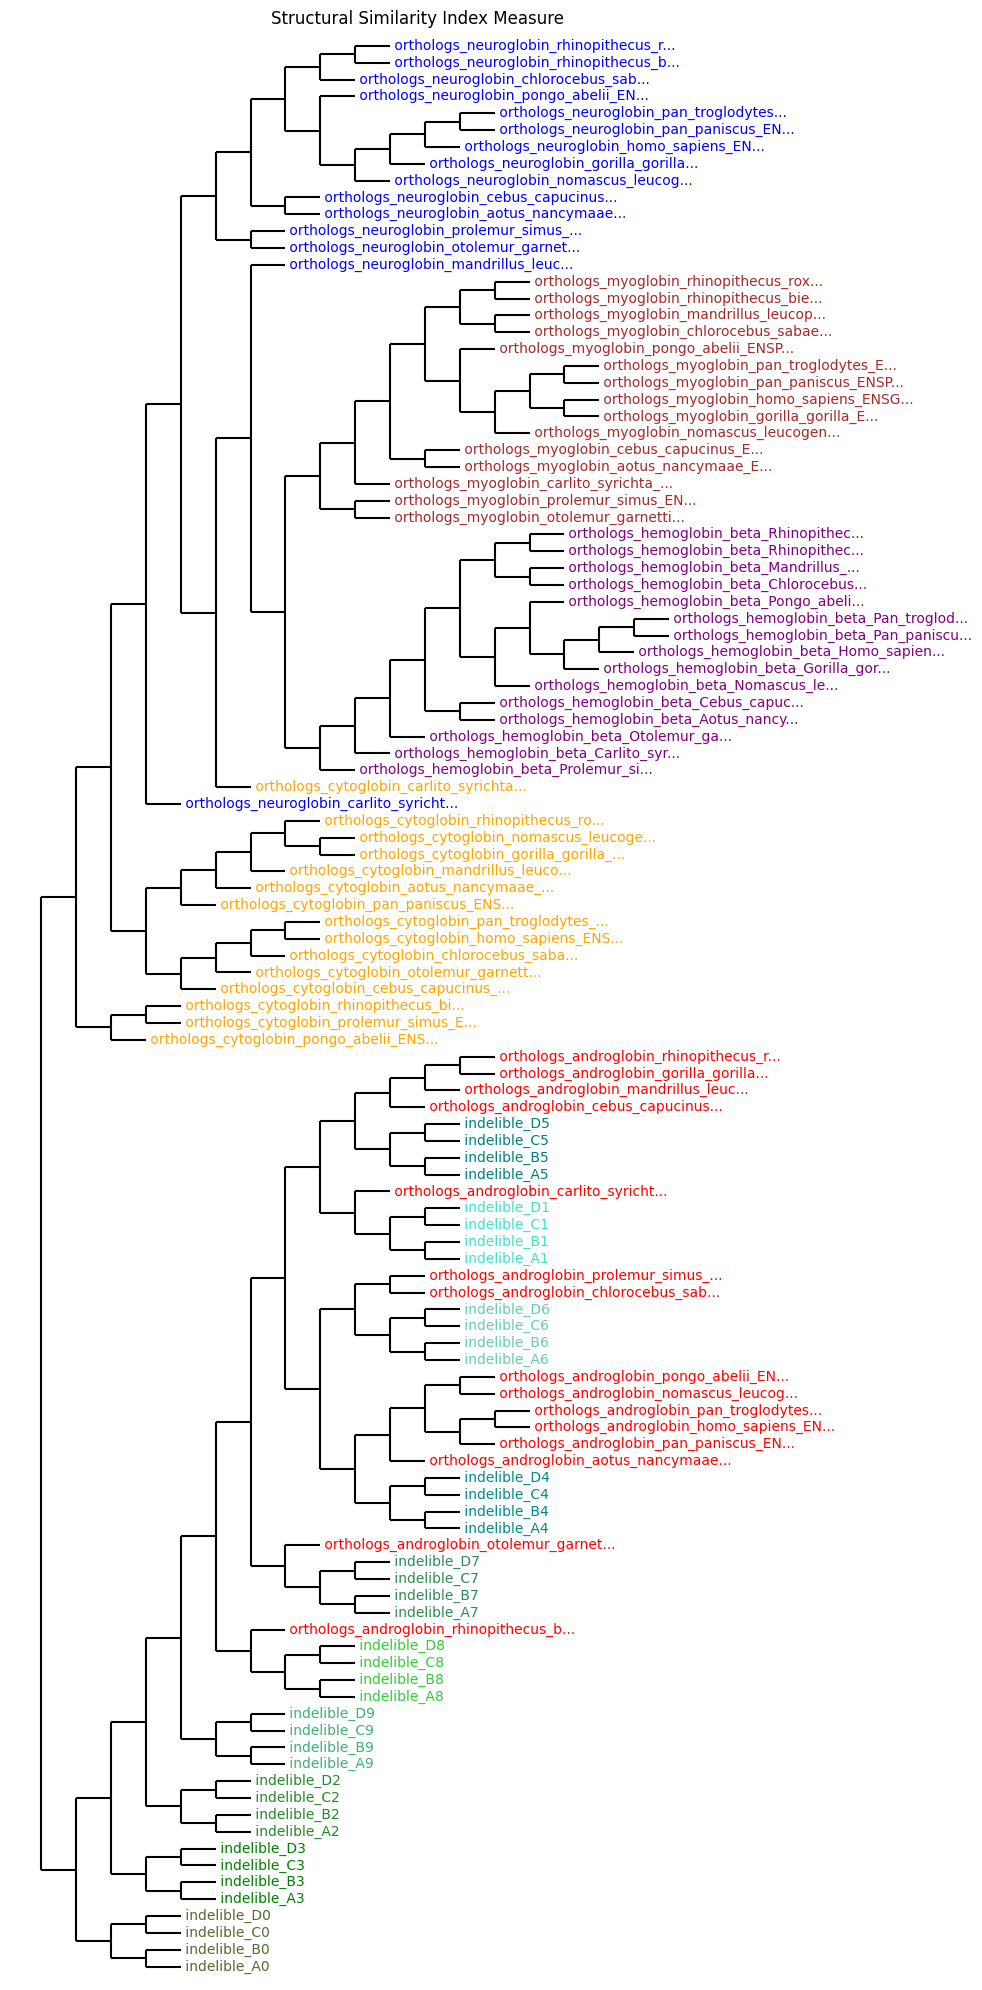

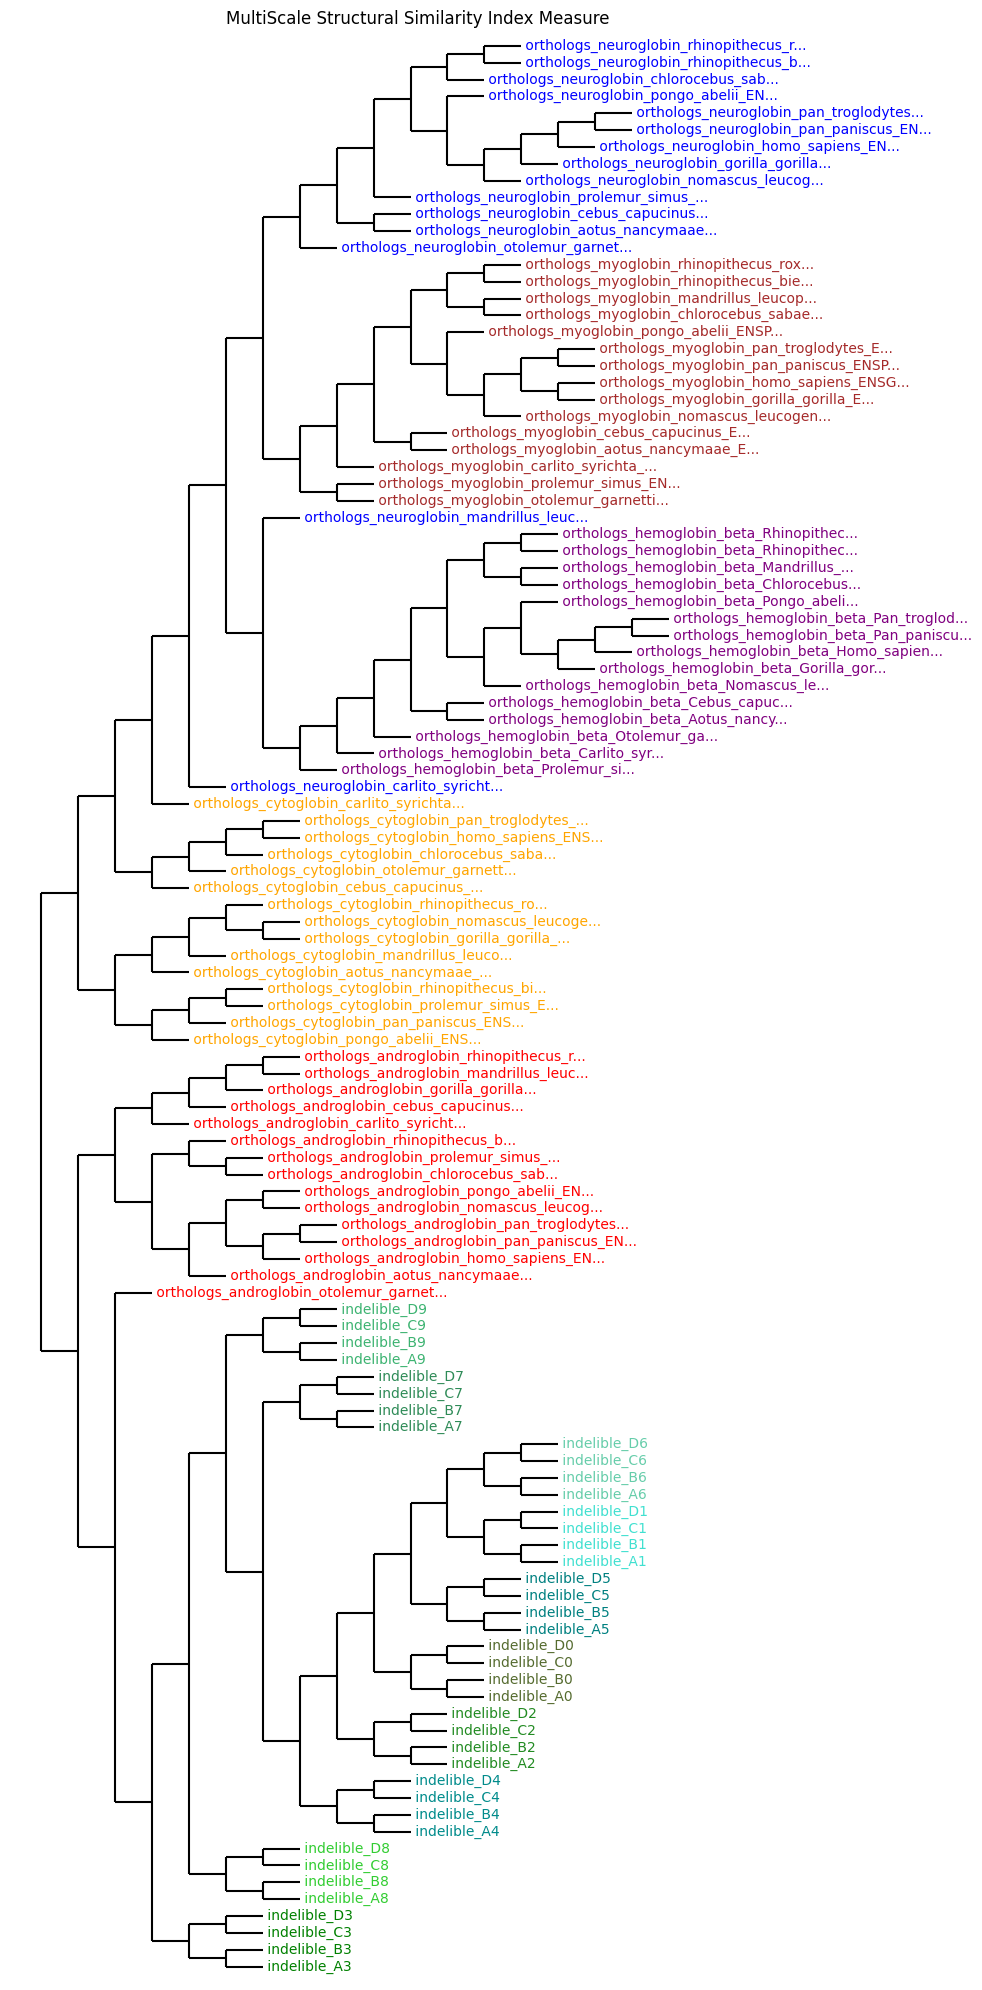

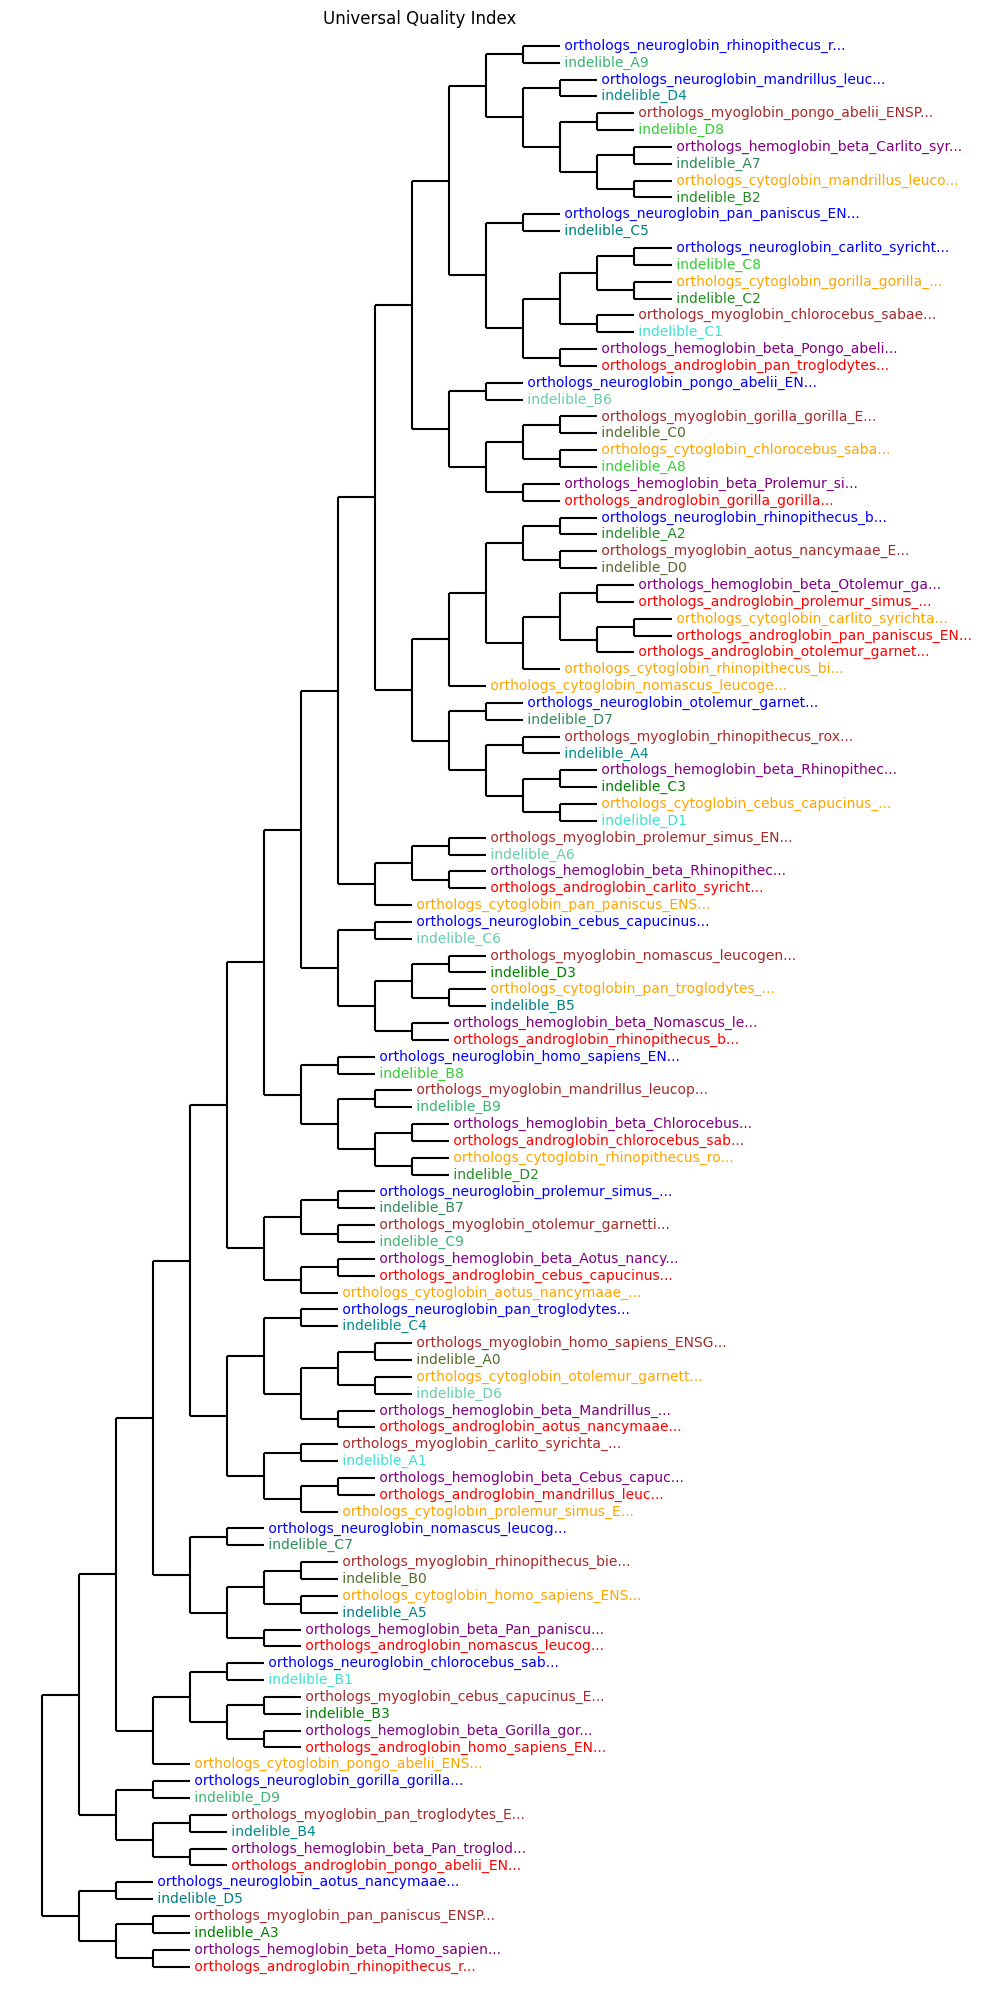

In [13]:
for alg, numpy_all in numpys_all.items():
    tree = upgma(1-numpy_all)
    fig, ax = pyplot.subplots(1, 1, figsize=(10, 20), layout="constrained")
    newick = tree.to_newick(labels=list(fixed_dfs_all[alg].columns), include_distance=False)
#     newick = tree.to_newick(labels=["_".join(i.replace("-", "_").split("_")[1:]) for i in list(fixed_dfs_all[alg].columns)], include_distance=False)
#     with open(f"{data_path}/blast/db_blast {alg}.nw", "w") as f:
#         f.write(newick)
    t = Phylo.read(StringIO(newick), "newick")
#     t.ladderize()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(alg)
    ax.axis('off')
    Phylo.draw(
        t,
        show_confidence=False,
        axes=ax,
        do_show=False,
        label_colors=color_clade,
        branch_labels=lambda clade: "" if not clade.name else "{:.2f}".format(
            clade.confidence) if clade.confidence else ""
    )
    pyplot.xlabel("")
    pyplot.ylabel("")
    pyplot.tight_layout()
    pyplot.show()

In [14]:
for alg, fixed_df_all in fixed_dfs_all.items():
    by_homologues = {}
    only_homologues = {}
    for column in fixed_df_all.columns:
        name = column.split("_")[0] if len(column.split("_")) == 2 else column.split("_")[1]
        k = 40 if len(column.split("_")) == 2 else 14
        if name in by_homologues:
            by_homologues[name] += list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[name] += [i.split("_")[0] if len(i.split("_")) == 2 else i.split("_")[1] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]
        else:
            by_homologues[name] = list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[name] = [i.split("_")[0] if len(i.split("_")) == 2 else i.split("_")[1] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]

    #Precision, MAP
    print(f"--------{alg}--------")
    for h in only_homologues:
        print(h)
        print("Precision:", sum([i==h for i in only_homologues[h]])/len(only_homologues[h]))
        precision = [0]
        p_k = 0
        for i in only_homologues[h]:
            precision.append((i==h)+precision[-1])
        for k in range(1,len(precision)):
            p_k += precision[k]/k
        print("Mean Average Precision", p_k/len(only_homologues[h]))
        print("-------------------------------------------------")

--------Structural Similarity Index Measure--------
indelible
Precision: 0.625
Mean Average Precision 0.612666402322727
-------------------------------------------------
androglobin
Precision: 0.19047619047619047
Mean Average Precision 0.20756628970887642
-------------------------------------------------
cytoglobin
Precision: 0.40476190476190477
Mean Average Precision 0.46972616500346115
-------------------------------------------------
hemoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
myoglobin
Precision: 1.0
Mean Average Precision 1.0
-------------------------------------------------
neuroglobin
Precision: 0.7428571428571429
Mean Average Precision 0.6922355751409691
-------------------------------------------------
--------MultiScale Structural Similarity Index Measure--------
indelible
Precision: 0.975
Mean Average Precision 0.9766871229250671
-------------------------------------------------
androglobin
Precision: 0.8666666666666

In [15]:
pandas.set_option('display.max_columns', 500) 
for alg, fixed_df_all in fixed_dfs_all.items():
    print(f"--------{alg}--------")
    display(fixed_df_all.describe())

--------Structural Similarity Index Measure--------


,indelible_A0,indelible_A1,indelible_A2,indelible_A3,indelible_A4,indelible_A5,indelible_A6,indelible_A7,indelible_A8,indelible_A9,indelible_B0,indelible_B1,indelible_B2,indelible_B3,indelible_B4,indelible_B5,indelible_B6,indelible_B7,indelible_B8,indelible_B9,indelible_C0,indelible_C1,indelible_C2,indelible_C3,indelible_C4,indelible_C5,indelible_C6,indelible_C7,indelible_C8,indelible_C9,indelible_D0,indelible_D1,indelible_D2,indelible_D3,indelible_D4,indelible_D5,indelible_D6,indelible_D7,indelible_D8,indelible_D9,orthologs_androglobin_aotus_nancymaae_ENSANAG00000025329,orthologs_androglobin_carlito_syrichta_ENSTSYG00000002644,orthologs_androglobin_cebus_capucinus_ENSCCAG00000032521,orthologs_androglobin_chlorocebus_sabaeus_ENSCSAG00000017175,orthologs_androglobin_gorilla_gorilla_ENSGGOG00000001069,orthologs_androglobin_homo_sapiens_ENSG00000118492,orthologs_androglobin_mandrillus_leucophaeus_ENSMLEG00000042349,orthologs_androglobin_nomascus_leucogenys_ENSNLEG00000015247,orthologs_androglobin_otolemur_garnettii_ENSOGAG00000024602,orthologs_androglobin_pan_paniscus_ENSPPAG00000031064,orthologs_androglobin_pan_troglodytes_ENSPTRG00000018686,orthologs_androglobin_pongo_abelii_ENSPPYG00000017077,orthologs_androglobin_prolemur_simus_ENSPSMG00000018921,orthologs_androglobin_rhinopithecus_bieti_ENSRBIG00000033722,orthologs_androglobin_rhinopithecus_roxellana_ENSRROG00000037836,orthologs_cytoglobin_aotus_nancymaae_ENSANAG00000037374,orthologs_cytoglobin_carlito_syrichta_ENSTSYG00000029754,orthologs_cytoglobin_cebus_capucinus_ENSCCAG00000037088,orthologs_cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,orthologs_cytoglobin_gorilla_gorilla_ENSGGOG00000001385,orthologs_cytoglobin_homo_sapiens_ENSG00000161544,orthologs_cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,orthologs_cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,orthologs_cytoglobin_otolemur_garnettii_ENSOGAG00000034659,orthologs_cytoglobin_pan_paniscus_ENSPPAG00000043476,orthologs_cytoglobin_pan_troglodytes_ENSPTRG00000033861,orthologs_cytoglobin_pongo_abelii_ENSPPYG00000008661,orthologs_cytoglobin_prolemur_simus_ENSPSMG00000023947,orthologs_cytoglobin_rhinopithecus_bieti_ENSRBIG00000040278,orthologs_cytoglobin_rhinopithecus_roxellana_ENSRROG00000038611,orthologs_hemoglobin_beta_Aotus_nancymaae_ENSANAP00000000486_Anan,orthologs_hemoglobin_beta_Carlito_syrichta_ENSTSYP00000007411_Csyr,orthologs_hemoglobin_beta_Cebus_capucinus_ENSCCAP00000028244_Ccap,orthologs_hemoglobin_beta_Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,orthologs_hemoglobin_beta_Gorilla_gorilla_ENSGGOP00000022371_Ggor,orthologs_hemoglobin_beta_Homo_sapiens_ENSP00000333994_Hsap,orthologs_hemoglobin_beta_Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,orthologs_hemoglobin_beta_Nomascus_leucogenys_ENSNLEP00000021062_Nleu,orthologs_hemoglobin_beta_Otolemur_garnettii_ENSOGAP00000006779_Ogar,orthologs_hemoglobin_beta_Pan_paniscus_ENSPPAP00000004625_Ppan,orthologs_hemoglobin_beta_Pan_troglodytes_ENSPTRP00000005700_Ptro,orthologs_hemoglobin_beta_Pongo_abelii_ENSPPYP00000004109_Pabe,orthologs_hemoglobin_beta_Prolemur_simus_ENSPSMP00000000465_Psim,orthologs_hemoglobin_beta_Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,orthologs_hemoglobin_beta_Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,orthologs_myoglobin_aotus_nancymaae_ENSANAG00000020373,orthologs_myoglobin_carlito_syrichta_ENSTSYG00000026219,orthologs_myoglobin_cebus_capucinus_ENSCCAG00000031738,orthologs_myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,orthologs_myoglobin_gorilla_gorilla_ENSGGOG00000011478,orthologs_myoglobin_homo_sapiens_ENSG00000198125,orthologs_myoglobin_mandrillus_leucophaeus_ENSMLEG00000032335,orthologs_myoglobin_nomascus_leucogenys_ENSNLEG00000014375,orthologs_myoglobin_otolemur_garnettii_ENSOGAG00000005651,orthologs_myoglobin_pan_paniscus_ENSPPAG00000036732,orthologs_myoglobin_pan_troglodytes_ENSPTRG00000023553,orthologs_myoglobin_pongo_abelii_ENSPPYG00000040455,orthologs_myoglobin_prolemur_simus_ENSPSMG00000021110,orthologs_myoglobin

--------MultiScale Structural Similarity Index Measure--------


,indelible_A0,indelible_A1,indelible_A2,indelible_A3,indelible_A4,indelible_A5,indelible_A6,indelible_A7,indelible_A8,indelible_A9,indelible_B0,indelible_B1,indelible_B2,indelible_B3,indelible_B4,indelible_B5,indelible_B6,indelible_B7,indelible_B8,indelible_B9,indelible_C0,indelible_C1,indelible_C2,indelible_C3,indelible_C4,indelible_C5,indelible_C6,indelible_C7,indelible_C8,indelible_C9,indelible_D0,indelible_D1,indelible_D2,indelible_D3,indelible_D4,indelible_D5,indelible_D6,indelible_D7,indelible_D8,indelible_D9,orthologs_androglobin_aotus_nancymaae_ENSANAG00000025329,orthologs_androglobin_carlito_syrichta_ENSTSYG00000002644,orthologs_androglobin_cebus_capucinus_ENSCCAG00000032521,orthologs_androglobin_chlorocebus_sabaeus_ENSCSAG00000017175,orthologs_androglobin_gorilla_gorilla_ENSGGOG00000001069,orthologs_androglobin_homo_sapiens_ENSG00000118492,orthologs_androglobin_mandrillus_leucophaeus_ENSMLEG00000042349,orthologs_androglobin_nomascus_leucogenys_ENSNLEG00000015247,orthologs_androglobin_otolemur_garnettii_ENSOGAG00000024602,orthologs_androglobin_pan_paniscus_ENSPPAG00000031064,orthologs_androglobin_pan_troglodytes_ENSPTRG00000018686,orthologs_androglobin_pongo_abelii_ENSPPYG00000017077,orthologs_androglobin_prolemur_simus_ENSPSMG00000018921,orthologs_androglobin_rhinopithecus_bieti_ENSRBIG00000033722,orthologs_androglobin_rhinopithecus_roxellana_ENSRROG00000037836,orthologs_cytoglobin_aotus_nancymaae_ENSANAG00000037374,orthologs_cytoglobin_carlito_syrichta_ENSTSYG00000029754,orthologs_cytoglobin_cebus_capucinus_ENSCCAG00000037088,orthologs_cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,orthologs_cytoglobin_gorilla_gorilla_ENSGGOG00000001385,orthologs_cytoglobin_homo_sapiens_ENSG00000161544,orthologs_cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,orthologs_cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,orthologs_cytoglobin_otolemur_garnettii_ENSOGAG00000034659,orthologs_cytoglobin_pan_paniscus_ENSPPAG00000043476,orthologs_cytoglobin_pan_troglodytes_ENSPTRG00000033861,orthologs_cytoglobin_pongo_abelii_ENSPPYG00000008661,orthologs_cytoglobin_prolemur_simus_ENSPSMG00000023947,orthologs_cytoglobin_rhinopithecus_bieti_ENSRBIG00000040278,orthologs_cytoglobin_rhinopithecus_roxellana_ENSRROG00000038611,orthologs_hemoglobin_beta_Aotus_nancymaae_ENSANAP00000000486_Anan,orthologs_hemoglobin_beta_Carlito_syrichta_ENSTSYP00000007411_Csyr,orthologs_hemoglobin_beta_Cebus_capucinus_ENSCCAP00000028244_Ccap,orthologs_hemoglobin_beta_Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,orthologs_hemoglobin_beta_Gorilla_gorilla_ENSGGOP00000022371_Ggor,orthologs_hemoglobin_beta_Homo_sapiens_ENSP00000333994_Hsap,orthologs_hemoglobin_beta_Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,orthologs_hemoglobin_beta_Nomascus_leucogenys_ENSNLEP00000021062_Nleu,orthologs_hemoglobin_beta_Otolemur_garnettii_ENSOGAP00000006779_Ogar,orthologs_hemoglobin_beta_Pan_paniscus_ENSPPAP00000004625_Ppan,orthologs_hemoglobin_beta_Pan_troglodytes_ENSPTRP00000005700_Ptro,orthologs_hemoglobin_beta_Pongo_abelii_ENSPPYP00000004109_Pabe,orthologs_hemoglobin_beta_Prolemur_simus_ENSPSMP00000000465_Psim,orthologs_hemoglobin_beta_Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,orthologs_hemoglobin_beta_Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,orthologs_myoglobin_aotus_nancymaae_ENSANAG00000020373,orthologs_myoglobin_carlito_syrichta_ENSTSYG00000026219,orthologs_myoglobin_cebus_capucinus_ENSCCAG00000031738,orthologs_myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,orthologs_myoglobin_gorilla_gorilla_ENSGGOG00000011478,orthologs_myoglobin_homo_sapiens_ENSG00000198125,orthologs_myoglobin_mandrillus_leucophaeus_ENSMLEG00000032335,orthologs_myoglobin_nomascus_leucogenys_ENSNLEG00000014375,orthologs_myoglobin_otolemur_garnettii_ENSOGAG00000005651,orthologs_myoglobin_pan_paniscus_ENSPPAG00000036732,orthologs_myoglobin_pan_troglodytes_ENSPTRG00000023553,orthologs_myoglobin_pongo_abelii_ENSPPYG00000040455,orthologs_myoglobin_prolemur_simus_ENSPSMG00000021110,orthologs_myoglobin

--------Universal Quality Index--------


,indelible_A0,indelible_A1,indelible_A2,indelible_A3,indelible_A4,indelible_A5,indelible_A6,indelible_A7,indelible_A8,indelible_A9,indelible_B0,indelible_B1,indelible_B2,indelible_B3,indelible_B4,indelible_B5,indelible_B6,indelible_B7,indelible_B8,indelible_B9,indelible_C0,indelible_C1,indelible_C2,indelible_C3,indelible_C4,indelible_C5,indelible_C6,indelible_C7,indelible_C8,indelible_C9,indelible_D0,indelible_D1,indelible_D2,indelible_D3,indelible_D4,indelible_D5,indelible_D6,indelible_D7,indelible_D8,indelible_D9,orthologs_androglobin_aotus_nancymaae_ENSANAG00000025329,orthologs_androglobin_carlito_syrichta_ENSTSYG00000002644,orthologs_androglobin_cebus_capucinus_ENSCCAG00000032521,orthologs_androglobin_chlorocebus_sabaeus_ENSCSAG00000017175,orthologs_androglobin_gorilla_gorilla_ENSGGOG00000001069,orthologs_androglobin_homo_sapiens_ENSG00000118492,orthologs_androglobin_mandrillus_leucophaeus_ENSMLEG00000042349,orthologs_androglobin_nomascus_leucogenys_ENSNLEG00000015247,orthologs_androglobin_otolemur_garnettii_ENSOGAG00000024602,orthologs_androglobin_pan_paniscus_ENSPPAG00000031064,orthologs_androglobin_pan_troglodytes_ENSPTRG00000018686,orthologs_androglobin_pongo_abelii_ENSPPYG00000017077,orthologs_androglobin_prolemur_simus_ENSPSMG00000018921,orthologs_androglobin_rhinopithecus_bieti_ENSRBIG00000033722,orthologs_androglobin_rhinopithecus_roxellana_ENSRROG00000037836,orthologs_cytoglobin_aotus_nancymaae_ENSANAG00000037374,orthologs_cytoglobin_carlito_syrichta_ENSTSYG00000029754,orthologs_cytoglobin_cebus_capucinus_ENSCCAG00000037088,orthologs_cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,orthologs_cytoglobin_gorilla_gorilla_ENSGGOG00000001385,orthologs_cytoglobin_homo_sapiens_ENSG00000161544,orthologs_cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,orthologs_cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,orthologs_cytoglobin_otolemur_garnettii_ENSOGAG00000034659,orthologs_cytoglobin_pan_paniscus_ENSPPAG00000043476,orthologs_cytoglobin_pan_troglodytes_ENSPTRG00000033861,orthologs_cytoglobin_pongo_abelii_ENSPPYG00000008661,orthologs_cytoglobin_prolemur_simus_ENSPSMG00000023947,orthologs_cytoglobin_rhinopithecus_bieti_ENSRBIG00000040278,orthologs_cytoglobin_rhinopithecus_roxellana_ENSRROG00000038611,orthologs_hemoglobin_beta_Aotus_nancymaae_ENSANAP00000000486_Anan,orthologs_hemoglobin_beta_Carlito_syrichta_ENSTSYP00000007411_Csyr,orthologs_hemoglobin_beta_Cebus_capucinus_ENSCCAP00000028244_Ccap,orthologs_hemoglobin_beta_Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,orthologs_hemoglobin_beta_Gorilla_gorilla_ENSGGOP00000022371_Ggor,orthologs_hemoglobin_beta_Homo_sapiens_ENSP00000333994_Hsap,orthologs_hemoglobin_beta_Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,orthologs_hemoglobin_beta_Nomascus_leucogenys_ENSNLEP00000021062_Nleu,orthologs_hemoglobin_beta_Otolemur_garnettii_ENSOGAP00000006779_Ogar,orthologs_hemoglobin_beta_Pan_paniscus_ENSPPAP00000004625_Ppan,orthologs_hemoglobin_beta_Pan_troglodytes_ENSPTRP00000005700_Ptro,orthologs_hemoglobin_beta_Pongo_abelii_ENSPPYP00000004109_Pabe,orthologs_hemoglobin_beta_Prolemur_simus_ENSPSMP00000000465_Psim,orthologs_hemoglobin_beta_Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,orthologs_hemoglobin_beta_Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,orthologs_myoglobin_aotus_nancymaae_ENSANAG00000020373,orthologs_myoglobin_carlito_syrichta_ENSTSYG00000026219,orthologs_myoglobin_cebus_capucinus_ENSCCAG00000031738,orthologs_myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,orthologs_myoglobin_gorilla_gorilla_ENSGGOG00000011478,orthologs_myoglobin_homo_sapiens_ENSG00000198125,orthologs_myoglobin_mandrillus_leucophaeus_ENSMLEG00000032335,orthologs_myoglobin_nomascus_leucogenys_ENSNLEG00000014375,orthologs_myoglobin_otolemur_garnettii_ENSOGAG00000005651,orthologs_myoglobin_pan_paniscus_ENSPPAG00000036732,orthologs_myoglobin_pan_troglodytes_ENSPTRG00000023553,orthologs_myoglobin_pongo_abelii_ENSPPYG00000040455,orthologs_myoglobin_prolemur_simus_ENSPSMG00000021110,orthologs_myoglobin

In [16]:
dfs_control = {}
control_dir = os.path.join(data_path, "blast")
for f in os.listdir(control_dir):
    if f.endswith(".csv"):
        name = f.split(".")[0]
        dfs_control[name] = pandas.read_csv(os.path.join(control_dir, f))

In [17]:
for dataset, df_control in dfs_control.items():
    k=15 if "orthologs" in dataset else 40
    name = (dataset.replace("orthologs_", ""),) if "orthologs" in dataset else list(map("".join, itertools.product("ABCD", string.digits)))
    print(dataset)
    results = dfs_control[dataset].groupby("qseqid").head(k).groupby("qseqid").apply(
        lambda x: x["sseqid"].str.split("-", expand = True)[0].isin(name))
    print("Precision:", results.sum() / results.count())
    precision = [0]
    p_k = 0
    for i in results:
        precision.append(i+precision[-1])
    for k in range(1,len(precision)):
        p_k += precision[k]/k
    print("Mean Average Precision", p_k/results.count())
    display(df_control.groupby("qseqid").head(k).pivot(index="qseqid", columns="sseqid", values="bitscore"))

orthologs_cytoglobin
Precision: 1.0
Mean Average Precision 1.0


sseqid,A0,A1,A2,A4,A5,A6,A7,A8,A9,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,C0,C1,C2,C3,C4,C5,C7,C8,C9,D0,D1,D3,D4,D5,D6,D7,D8,D9,androglobin-aotus_nancymaae_ENSANAG00000025329,androglobin-carlito_syrichta_ENSTSYG00000002644,androglobin-cebus_capucinus_ENSCCAG00000032521,androglobin-chlorocebus_sabaeus_ENSCSAG00000017175,androglobin-gorilla_gorilla_ENSGGOG00000001069,androglobin-homo_sapiens_ENSG00000118492,androglobin-mandrillus_leucophaeus_ENSMLEG00000042349,androglobin-nomascus_leucogenys_ENSNLEG00000015247,androglobin-otolemur_garnettii_ENSOGAG00000024602,androglobin-pan_paniscus_ENSPPAG00000031064,androglobin-pan_troglodytes_ENSPTRG00000018686,androglobin-pongo_abelii_ENSPPYG00000017077,androglobin-prolemur_simus_ENSPSMG00000018921,androglobin-rhinopithecus_bieti_ENSRBIG00000033722,androglobin-rhinopithecus_roxellana_ENSRROG00000037836,cytoglobin-aotus_nancymaae_ENSANAG00000037374,cytoglobin-carlito_syrichta_ENSTSYG00000029754,cytoglobin-cebus_capucinus_ENSCCAG00000037088,cytoglobin-chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin-gorilla_gorilla_ENSGGOG00000001385,cytoglobin-homo_sapiens_ENSG00000161544,cytoglobin-mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin-nomascus_leucogenys_ENSNLEG00000002476,cytoglobin-otolemur_garnettii_ENSOGAG00000034659,cytoglobin-pan_paniscus_ENSPPAG00000043476,cytoglobin-pan_troglodytes_ENSPTRG00000033861,cytoglobin-pongo_abelii_ENSPPYG00000008661,cytoglobin-prolemur_simus_ENSPSMG00000023947,cytoglobin-rhinopithecus_bieti_ENSRBIG00000040278,cytoglobin-rhinopithecus_roxellana_ENSRROG00000038611,hemoglobin_beta-Aotus_nancymaae_ENSANAP00000000486_Anan,hemoglobin_beta-Carlito_syrichta_ENSTSYP00000007411_Csyr,hemoglobin_beta-Cebus_capucinus_ENSCCAP00000028244_Ccap,hemoglobin_beta-Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,hemoglobin_beta-Gorilla_gorilla_ENSGGOP00000022371_Ggor,hemoglobin_beta-Homo_sapiens_ENSP00000333994_Hsap,hemoglobin_beta-Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,hemoglobin_beta-Nomascus_leucogenys_ENSNLEP00000021062_Nleu,hemoglobin_beta-Otolemur_garnettii_ENSOGAP00000006779_Ogar,hemoglobin_beta-Pan_paniscus_ENSPPAP00000004625_Ppan,hemoglobin_beta-Pan_troglodytes_ENSPTRP00000005700_Ptro,hemoglobin_beta-Pongo_abelii_ENSPPYP00000004109_Pabe,hemoglobin_beta-Prolemur_simus_ENSPSMP00000000465_Psim,hemoglobin_beta-Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,hemoglobin_beta-Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,myoglobin-aotus_nancymaae_ENSANAG00000020373,myoglobin-carlito_syrichta_ENSTSYG00000026219,myoglobin-cebus_capucinus_ENSCCAG00000031738,myoglobin-chlorocebus_sabaeus_ENSCSAG00000008174,myoglobin-gorilla_gorilla_ENSGGOG00000011478,myoglobin-homo_sapiens_ENSG00000198125,myoglobin-mandrillus_leucophaeus_ENSMLEG00000032335,myoglobin-nomascus_leucogenys_ENSNLEG00000014375,myoglobin-otolemur_garnettii_ENSOGAG00000005651,myoglobin-pan_paniscus_ENSPPAG00000036732,myoglobin-pan_troglodytes_ENSPTRG00000023553,myoglobin-pongo_abelii_ENSPPYG00000040455,myoglobin-prolemur_simus_ENSPSMG00000021110,myoglobin-rhinopithecus_bieti_ENSRBIG00000040058,myoglobin-rhinopithecus_roxellana_ENSRROG00000020662,neuroglobin-aotus_nancymaae_ENSANAG00000022420,neuroglobin-carlito_syrichta_ENSTSYG00000026821,neuroglobin-cebus_capucinus_ENSCCAG00000020944,neuroglobin-chlorocebus_sabaeus_ENSCSAG00000011845,neuroglobin-gorilla_gorilla_ENSGGOG00000006195,neuroglobin-homo_sapiens_ENSG00000165553,neuroglobin-mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin-nomascus_leucogenys_ENSNLEG00000016682,neuroglobin-otolemur_garnettii_ENSOGAG00000006194,neuroglobin-pan_paniscus_ENSPPAG00000040520,neuroglobin-pan_troglodytes_ENSPTRG00000006575,neuroglobin-pongo_abelii_ENSPPYG00000006019,neuroglobin-prolemur_simus_ENSPSMG00000011006,neuroglobin-rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin-rhinopithecus_roxellana_ENSRROG00000044996
qseqid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aotus_nancymaae_ENSANAG00000037374,21.4,21.4,25.1,21.4,NaN

orthologs_androglobin
Precision: 1.0
Mean Average Precision 1.0


sseqid,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,androglobin-aotus_nancymaae_ENSANAG00000025329,androglobin-carlito_syrichta_ENSTSYG00000002644,androglobin-cebus_capucinus_ENSCCAG00000032521,androglobin-chlorocebus_sabaeus_ENSCSAG00000017175,androglobin-gorilla_gorilla_ENSGGOG00000001069,androglobin-homo_sapiens_ENSG00000118492,androglobin-mandrillus_leucophaeus_ENSMLEG00000042349,androglobin-nomascus_leucogenys_ENSNLEG00000015247,androglobin-otolemur_garnettii_ENSOGAG00000024602,androglobin-pan_paniscus_ENSPPAG00000031064,androglobin-pan_troglodytes_ENSPTRG00000018686,androglobin-pongo_abelii_ENSPPYG00000017077,androglobin-prolemur_simus_ENSPSMG00000018921,androglobin-rhinopithecus_bieti_ENSRBIG00000033722,androglobin-rhinopithecus_roxellana_ENSRROG00000037836,cytoglobin-aotus_nancymaae_ENSANAG00000037374,cytoglobin-carlito_syrichta_ENSTSYG00000029754,cytoglobin-cebus_capucinus_ENSCCAG00000037088,cytoglobin-chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin-gorilla_gorilla_ENSGGOG00000001385,cytoglobin-homo_sapiens_ENSG00000161544,cytoglobin-mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin-nomascus_leucogenys_ENSNLEG00000002476,cytoglobin-otolemur_garnettii_ENSOGAG00000034659,cytoglobin-pan_paniscus_ENSPPAG00000043476,cytoglobin-pan_troglodytes_ENSPTRG00000033861,cytoglobin-pongo_abelii_ENSPPYG00000008661,cytoglobin-prolemur_simus_ENSPSMG00000023947,cytoglobin-rhinopithecus_bieti_ENSRBIG00000040278,cytoglobin-rhinopithecus_roxellana_ENSRROG00000038611,hemoglobin_beta-Aotus_nancymaae_ENSANAP00000000486_Anan,hemoglobin_beta-Carlito_syrichta_ENSTSYP00000007411_Csyr,hemoglobin_beta-Cebus_capucinus_ENSCCAP00000028244_Ccap,hemoglobin_beta-Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,hemoglobin_beta-Gorilla_gorilla_ENSGGOP00000022371_Ggor,hemoglobin_beta-Homo_sapiens_ENSP00000333994_Hsap,hemoglobin_beta-Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,hemoglobin_beta-Nomascus_leucogenys_ENSNLEP00000021062_Nleu,hemoglobin_beta-Otolemur_garnettii_ENSOGAP00000006779_Ogar,hemoglobin_beta-Pan_paniscus_ENSPPAP00000004625_Ppan,hemoglobin_beta-Pan_troglodytes_ENSPTRP00000005700_Ptro,hemoglobin_beta-Pongo_abelii_ENSPPYP00000004109_Pabe,hemoglobin_beta-Prolemur_simus_ENSPSMP00000000465_Psim,hemoglobin_beta-Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,hemoglobin_beta-Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,myoglobin-aotus_nancymaae_ENSANAG00000020373,myoglobin-carlito_syrichta_ENSTSYG00000026219,myoglobin-cebus_capucinus_ENSCCAG00000031738,myoglobin-chlorocebus_sabaeus_ENSCSAG00000008174,myoglobin-gorilla_gorilla_ENSGGOG00000011478,myoglobin-homo_sapiens_ENSG00000198125,myoglobin-mandrillus_leucophaeus_ENSMLEG00000032335,myoglobin-nomascus_leucogenys_ENSNLEG00000014375,myoglobin-otolemur_garnettii_ENSOGAG00000005651,myoglobin-pan_paniscus_ENSPPAG00000036732,myoglobin-pan_troglodytes_ENSPTRG00000023553,myoglobin-pongo_abelii_ENSPPYG00000040455,myoglobin-prolemur_simus_ENSPSMG00000021110,myoglobin-rhinopithecus_bieti_ENSRBIG00000040058,myoglobin-rhinopithecus_roxellana_ENSRROG00000020662,neuroglobin-aotus_nancymaae_ENSANAG00000022420,neuroglobin-chlorocebus_sabaeus_ENSCSAG00000011845,neuroglobin-gorilla_gorilla_ENSGGOG00000006195,neuroglobin-homo_sapiens_ENSG00000165553,neuroglobin-mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin-nomascus_leucogenys_ENSNLEG00000016682,neuroglobin-otolemur_garnettii_ENSOGAG00000006194,neuroglobin-pan_paniscus_ENSPPAG00000040520,neuroglobin-pan_troglodytes_ENSPTRG00000006575,neuroglobin-pongo_abelii_ENSPPYG00000006019,neuroglobin-prolemur_simus_ENSPSMG00000011006,neuroglobin-rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin-rhinopithecus_roxellana_ENSRROG00000044996
qseqid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aotus_nancymaae_ENSANAG00000025329,23.3,21.4,21.4,23.3,28.8,23.3,32.5,25.1,23.3,23.3,30.7,23.3,27.0,23.3,23.3,21.4,25.1,23.3,23.3,27.0,21.4,25.

orthologs_hemoglobin_beta
Precision: 1.0
Mean Average Precision 1.0


sseqid,A0,A2,A3,A4,A5,A7,A9,B0,B1,B3,B4,B6,B7,B8,B9,C0,C1,C3,C4,C6,C7,C8,C9,D0,D1,D2,D3,D5,D6,D8,D9,androglobin-aotus_nancymaae_ENSANAG00000025329,androglobin-carlito_syrichta_ENSTSYG00000002644,androglobin-cebus_capucinus_ENSCCAG00000032521,androglobin-chlorocebus_sabaeus_ENSCSAG00000017175,androglobin-gorilla_gorilla_ENSGGOG00000001069,androglobin-homo_sapiens_ENSG00000118492,androglobin-mandrillus_leucophaeus_ENSMLEG00000042349,androglobin-nomascus_leucogenys_ENSNLEG00000015247,androglobin-otolemur_garnettii_ENSOGAG00000024602,androglobin-pan_paniscus_ENSPPAG00000031064,androglobin-pan_troglodytes_ENSPTRG00000018686,androglobin-pongo_abelii_ENSPPYG00000017077,androglobin-prolemur_simus_ENSPSMG00000018921,androglobin-rhinopithecus_bieti_ENSRBIG00000033722,androglobin-rhinopithecus_roxellana_ENSRROG00000037836,cytoglobin-aotus_nancymaae_ENSANAG00000037374,cytoglobin-carlito_syrichta_ENSTSYG00000029754,cytoglobin-cebus_capucinus_ENSCCAG00000037088,cytoglobin-chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin-gorilla_gorilla_ENSGGOG00000001385,cytoglobin-homo_sapiens_ENSG00000161544,cytoglobin-mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin-nomascus_leucogenys_ENSNLEG00000002476,cytoglobin-otolemur_garnettii_ENSOGAG00000034659,cytoglobin-pan_paniscus_ENSPPAG00000043476,cytoglobin-pan_troglodytes_ENSPTRG00000033861,cytoglobin-pongo_abelii_ENSPPYG00000008661,cytoglobin-prolemur_simus_ENSPSMG00000023947,cytoglobin-rhinopithecus_bieti_ENSRBIG00000040278,cytoglobin-rhinopithecus_roxellana_ENSRROG00000038611,hemoglobin_beta-Aotus_nancymaae_ENSANAP00000000486_Anan,hemoglobin_beta-Carlito_syrichta_ENSTSYP00000007411_Csyr,hemoglobin_beta-Cebus_capucinus_ENSCCAP00000028244_Ccap,hemoglobin_beta-Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,hemoglobin_beta-Gorilla_gorilla_ENSGGOP00000022371_Ggor,hemoglobin_beta-Homo_sapiens_ENSP00000333994_Hsap,hemoglobin_beta-Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,hemoglobin_beta-Nomascus_leucogenys_ENSNLEP00000021062_Nleu,hemoglobin_beta-Otolemur_garnettii_ENSOGAP00000006779_Ogar,hemoglobin_beta-Pan_paniscus_ENSPPAP00000004625_Ppan,hemoglobin_beta-Pan_troglodytes_ENSPTRP00000005700_Ptro,hemoglobin_beta-Pongo_abelii_ENSPPYP00000004109_Pabe,hemoglobin_beta-Prolemur_simus_ENSPSMP00000000465_Psim,hemoglobin_beta-Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,hemoglobin_beta-Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,myoglobin-aotus_nancymaae_ENSANAG00000020373,myoglobin-cebus_capucinus_ENSCCAG00000031738,myoglobin-chlorocebus_sabaeus_ENSCSAG00000008174,myoglobin-gorilla_gorilla_ENSGGOG00000011478,myoglobin-homo_sapiens_ENSG00000198125,myoglobin-mandrillus_leucophaeus_ENSMLEG00000032335,myoglobin-nomascus_leucogenys_ENSNLEG00000014375,myoglobin-otolemur_garnettii_ENSOGAG00000005651,myoglobin-pan_paniscus_ENSPPAG00000036732,myoglobin-pan_troglodytes_ENSPTRG00000023553,myoglobin-pongo_abelii_ENSPPYG00000040455,myoglobin-prolemur_simus_ENSPSMG00000021110,myoglobin-rhinopithecus_bieti_ENSRBIG00000040058,myoglobin-rhinopithecus_roxellana_ENSRROG00000020662,neuroglobin-aotus_nancymaae_ENSANAG00000022420,neuroglobin-carlito_syrichta_ENSTSYG00000026821,neuroglobin-cebus_capucinus_ENSCCAG00000020944,neuroglobin-chlorocebus_sabaeus_ENSCSAG00000011845,neuroglobin-gorilla_gorilla_ENSGGOG00000006195,neuroglobin-homo_sapiens_ENSG00000165553,neuroglobin-mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin-nomascus_leucogenys_ENSNLEG00000016682,neuroglobin-otolemur_garnettii_ENSOGAG00000006194,neuroglobin-pan_paniscus_ENSPPAG00000040520,neuroglobin-pan_troglodytes_ENSPTRG00000006575,neuroglobin-pongo_abelii_ENSPPYG00000006019,neuroglobin-prolemur_simus_ENSPSMG00000011006,neuroglobin-rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin-rhinopithecus_roxellana_ENSRROG00000044996
qseqid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aotus_nancymaae_ENSANAP00000000486_Anan,21.4,23.3,21.4,NaN,NaN,NaN,21.4,23.3,21.4,21.4,NaN,23.3,23.3,NaN,NaN,NaN,21.4,21.4,21.4,N

orthologs_myoglobin
Precision: 1.0
Mean Average Precision 1.0


sseqid,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,C1,C3,C4,C5,C7,C8,C9,D0,D2,D3,D4,D7,D8,D9,androglobin-aotus_nancymaae_ENSANAG00000025329,androglobin-carlito_syrichta_ENSTSYG00000002644,androglobin-cebus_capucinus_ENSCCAG00000032521,androglobin-chlorocebus_sabaeus_ENSCSAG00000017175,androglobin-gorilla_gorilla_ENSGGOG00000001069,androglobin-homo_sapiens_ENSG00000118492,androglobin-mandrillus_leucophaeus_ENSMLEG00000042349,androglobin-nomascus_leucogenys_ENSNLEG00000015247,androglobin-otolemur_garnettii_ENSOGAG00000024602,androglobin-pan_paniscus_ENSPPAG00000031064,androglobin-pan_troglodytes_ENSPTRG00000018686,androglobin-pongo_abelii_ENSPPYG00000017077,androglobin-prolemur_simus_ENSPSMG00000018921,androglobin-rhinopithecus_bieti_ENSRBIG00000033722,androglobin-rhinopithecus_roxellana_ENSRROG00000037836,cytoglobin-aotus_nancymaae_ENSANAG00000037374,cytoglobin-cebus_capucinus_ENSCCAG00000037088,cytoglobin-chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin-gorilla_gorilla_ENSGGOG00000001385,cytoglobin-homo_sapiens_ENSG00000161544,cytoglobin-mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin-nomascus_leucogenys_ENSNLEG00000002476,cytoglobin-otolemur_garnettii_ENSOGAG00000034659,cytoglobin-pan_paniscus_ENSPPAG00000043476,cytoglobin-pan_troglodytes_ENSPTRG00000033861,cytoglobin-pongo_abelii_ENSPPYG00000008661,cytoglobin-prolemur_simus_ENSPSMG00000023947,cytoglobin-rhinopithecus_bieti_ENSRBIG00000040278,cytoglobin-rhinopithecus_roxellana_ENSRROG00000038611,hemoglobin_beta-Aotus_nancymaae_ENSANAP00000000486_Anan,hemoglobin_beta-Carlito_syrichta_ENSTSYP00000007411_Csyr,hemoglobin_beta-Cebus_capucinus_ENSCCAP00000028244_Ccap,hemoglobin_beta-Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,hemoglobin_beta-Gorilla_gorilla_ENSGGOP00000022371_Ggor,hemoglobin_beta-Homo_sapiens_ENSP00000333994_Hsap,hemoglobin_beta-Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,hemoglobin_beta-Nomascus_leucogenys_ENSNLEP00000021062_Nleu,hemoglobin_beta-Otolemur_garnettii_ENSOGAP00000006779_Ogar,hemoglobin_beta-Pan_paniscus_ENSPPAP00000004625_Ppan,hemoglobin_beta-Pan_troglodytes_ENSPTRP00000005700_Ptro,hemoglobin_beta-Pongo_abelii_ENSPPYP00000004109_Pabe,hemoglobin_beta-Prolemur_simus_ENSPSMP00000000465_Psim,hemoglobin_beta-Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,hemoglobin_beta-Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,myoglobin-aotus_nancymaae_ENSANAG00000020373,myoglobin-carlito_syrichta_ENSTSYG00000026219,myoglobin-cebus_capucinus_ENSCCAG00000031738,myoglobin-chlorocebus_sabaeus_ENSCSAG00000008174,myoglobin-gorilla_gorilla_ENSGGOG00000011478,myoglobin-homo_sapiens_ENSG00000198125,myoglobin-mandrillus_leucophaeus_ENSMLEG00000032335,myoglobin-nomascus_leucogenys_ENSNLEG00000014375,myoglobin-otolemur_garnettii_ENSOGAG00000005651,myoglobin-pan_paniscus_ENSPPAG00000036732,myoglobin-pan_troglodytes_ENSPTRG00000023553,myoglobin-pongo_abelii_ENSPPYG00000040455,myoglobin-prolemur_simus_ENSPSMG00000021110,myoglobin-rhinopithecus_bieti_ENSRBIG00000040058,myoglobin-rhinopithecus_roxellana_ENSRROG00000020662,neuroglobin-aotus_nancymaae_ENSANAG00000022420,neuroglobin-carlito_syrichta_ENSTSYG00000026821,neuroglobin-cebus_capucinus_ENSCCAG00000020944,neuroglobin-chlorocebus_sabaeus_ENSCSAG00000011845,neuroglobin-gorilla_gorilla_ENSGGOG00000006195,neuroglobin-homo_sapiens_ENSG00000165553,neuroglobin-mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin-nomascus_leucogenys_ENSNLEG00000016682,neuroglobin-pan_paniscus_ENSPPAG00000040520,neuroglobin-pan_troglodytes_ENSPTRG00000006575,neuroglobin-pongo_abelii_ENSPPYG00000006019,neuroglobin-prolemur_simus_ENSPSMG00000011006,neuroglobin-rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin-rhinopithecus_roxellana_ENSRROG00000044996
qseqid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aotus_nancymaae_ENSANAG00000020373,23.3,21.4,NaN,23.3,NaN,21.4,NaN,25.1,NaN,NaN,21.4,NaN,NaN,NaN,21.4,NaN,NaN,NaN,NaN,NaN,NaN,23.3,21.4,21.4,23.3,NaN,NaN,NaN,NaN,NaN,NaN

indelible
Precision: 0.6575
Mean Average Precision 0.6632178984228819


sseqid,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,androglobin-aotus_nancymaae_ENSANAG00000025329,androglobin-carlito_syrichta_ENSTSYG00000002644,androglobin-cebus_capucinus_ENSCCAG00000032521,androglobin-chlorocebus_sabaeus_ENSCSAG00000017175,androglobin-gorilla_gorilla_ENSGGOG00000001069,androglobin-homo_sapiens_ENSG00000118492,androglobin-mandrillus_leucophaeus_ENSMLEG00000042349,androglobin-nomascus_leucogenys_ENSNLEG00000015247,androglobin-otolemur_garnettii_ENSOGAG00000024602,androglobin-pan_paniscus_ENSPPAG00000031064,androglobin-pan_troglodytes_ENSPTRG00000018686,androglobin-pongo_abelii_ENSPPYG00000017077,androglobin-prolemur_simus_ENSPSMG00000018921,androglobin-rhinopithecus_bieti_ENSRBIG00000033722,androglobin-rhinopithecus_roxellana_ENSRROG00000037836,cytoglobin-aotus_nancymaae_ENSANAG00000037374,cytoglobin-carlito_syrichta_ENSTSYG00000029754,cytoglobin-cebus_capucinus_ENSCCAG00000037088,cytoglobin-chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin-gorilla_gorilla_ENSGGOG00000001385,cytoglobin-homo_sapiens_ENSG00000161544,cytoglobin-mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin-nomascus_leucogenys_ENSNLEG00000002476,cytoglobin-otolemur_garnettii_ENSOGAG00000034659,cytoglobin-pan_paniscus_ENSPPAG00000043476,cytoglobin-pan_troglodytes_ENSPTRG00000033861,cytoglobin-pongo_abelii_ENSPPYG00000008661,cytoglobin-prolemur_simus_ENSPSMG00000023947,cytoglobin-rhinopithecus_bieti_ENSRBIG00000040278,cytoglobin-rhinopithecus_roxellana_ENSRROG00000038611,hemoglobin_beta-Aotus_nancymaae_ENSANAP00000000486_Anan,hemoglobin_beta-Carlito_syrichta_ENSTSYP00000007411_Csyr,hemoglobin_beta-Cebus_capucinus_ENSCCAP00000028244_Ccap,hemoglobin_beta-Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,hemoglobin_beta-Gorilla_gorilla_ENSGGOP00000022371_Ggor,hemoglobin_beta-Homo_sapiens_ENSP00000333994_Hsap,hemoglobin_beta-Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,hemoglobin_beta-Nomascus_leucogenys_ENSNLEP00000021062_Nleu,hemoglobin_beta-Otolemur_garnettii_ENSOGAP00000006779_Ogar,hemoglobin_beta-Pan_paniscus_ENSPPAP00000004625_Ppan,hemoglobin_beta-Pan_troglodytes_ENSPTRP00000005700_Ptro,hemoglobin_beta-Pongo_abelii_ENSPPYP00000004109_Pabe,hemoglobin_beta-Prolemur_simus_ENSPSMP00000000465_Psim,hemoglobin_beta-Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,hemoglobin_beta-Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,myoglobin-aotus_nancymaae_ENSANAG00000020373,myoglobin-carlito_syrichta_ENSTSYG00000026219,myoglobin-cebus_capucinus_ENSCCAG00000031738,myoglobin-chlorocebus_sabaeus_ENSCSAG00000008174,myoglobin-gorilla_gorilla_ENSGGOG00000011478,myoglobin-homo_sapiens_ENSG00000198125,myoglobin-mandrillus_leucophaeus_ENSMLEG00000032335,myoglobin-nomascus_leucogenys_ENSNLEG00000014375,myoglobin-otolemur_garnettii_ENSOGAG00000005651,myoglobin-pan_paniscus_ENSPPAG00000036732,myoglobin-pan_troglodytes_ENSPTRG00000023553,myoglobin-pongo_abelii_ENSPPYG00000040455,myoglobin-prolemur_simus_ENSPSMG00000021110,myoglobin-rhinopithecus_bieti_ENSRBIG00000040058,myoglobin-rhinopithecus_roxellana_ENSRROG00000020662,neuroglobin-aotus_nancymaae_ENSANAG00000022420,neuroglobin-carlito_syrichta_ENSTSYG00000026821,neuroglobin-cebus_capucinus_ENSCCAG00000020944,neuroglobin-chlorocebus_sabaeus_ENSCSAG00000011845,neuroglobin-gorilla_gorilla_ENSGGOG00000006195,neuroglobin-homo_sapiens_ENSG00000165553,neuroglobin-mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin-nomascus_leucogenys_ENSNLEG00000016682,neuroglobin-otolemur_garnettii_ENSOGAG00000006194,neuroglobin-pan_paniscus_ENSPPAG00000040520,neuroglobin-pan_troglodytes_ENSPTRG00000006575,neuroglobin-pongo_abelii_ENSPPYG00000006019,neuroglobin-prolemur_simus_ENSPSMG00000011006,neuroglobin-rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin-rhinopithecus_roxellana_ENSRROG00000044996
qseqid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A0,5541.0,21.4,27.0,23.3,27.0,23.3,21.4,NaN,25

orthologs_neuroglobin
Precision: 1.0
Mean Average Precision 1.0


sseqid,A0,A1,A2,A3,A5,A6,A7,A8,B1,B3,B4,B5,B6,B8,B9,C0,C1,C2,C3,C4,C6,C7,C9,D0,D3,D5,D6,D7,D8,D9,androglobin-aotus_nancymaae_ENSANAG00000025329,androglobin-cebus_capucinus_ENSCCAG00000032521,androglobin-chlorocebus_sabaeus_ENSCSAG00000017175,androglobin-gorilla_gorilla_ENSGGOG00000001069,androglobin-homo_sapiens_ENSG00000118492,androglobin-nomascus_leucogenys_ENSNLEG00000015247,androglobin-pan_paniscus_ENSPPAG00000031064,androglobin-pan_troglodytes_ENSPTRG00000018686,androglobin-pongo_abelii_ENSPPYG00000017077,androglobin-prolemur_simus_ENSPSMG00000018921,androglobin-rhinopithecus_bieti_ENSRBIG00000033722,androglobin-rhinopithecus_roxellana_ENSRROG00000037836,cytoglobin-aotus_nancymaae_ENSANAG00000037374,cytoglobin-carlito_syrichta_ENSTSYG00000029754,cytoglobin-cebus_capucinus_ENSCCAG00000037088,cytoglobin-chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin-gorilla_gorilla_ENSGGOG00000001385,cytoglobin-homo_sapiens_ENSG00000161544,cytoglobin-mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin-nomascus_leucogenys_ENSNLEG00000002476,cytoglobin-otolemur_garnettii_ENSOGAG00000034659,cytoglobin-pan_paniscus_ENSPPAG00000043476,cytoglobin-pan_troglodytes_ENSPTRG00000033861,cytoglobin-pongo_abelii_ENSPPYG00000008661,cytoglobin-prolemur_simus_ENSPSMG00000023947,cytoglobin-rhinopithecus_bieti_ENSRBIG00000040278,cytoglobin-rhinopithecus_roxellana_ENSRROG00000038611,hemoglobin_beta-Aotus_nancymaae_ENSANAP00000000486_Anan,hemoglobin_beta-Carlito_syrichta_ENSTSYP00000007411_Csyr,hemoglobin_beta-Cebus_capucinus_ENSCCAP00000028244_Ccap,hemoglobin_beta-Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,hemoglobin_beta-Gorilla_gorilla_ENSGGOP00000022371_Ggor,hemoglobin_beta-Homo_sapiens_ENSP00000333994_Hsap,hemoglobin_beta-Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,hemoglobin_beta-Nomascus_leucogenys_ENSNLEP00000021062_Nleu,hemoglobin_beta-Otolemur_garnettii_ENSOGAP00000006779_Ogar,hemoglobin_beta-Pan_paniscus_ENSPPAP00000004625_Ppan,hemoglobin_beta-Pan_troglodytes_ENSPTRP00000005700_Ptro,hemoglobin_beta-Pongo_abelii_ENSPPYP00000004109_Pabe,hemoglobin_beta-Prolemur_simus_ENSPSMP00000000465_Psim,hemoglobin_beta-Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,hemoglobin_beta-Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,myoglobin-aotus_nancymaae_ENSANAG00000020373,myoglobin-carlito_syrichta_ENSTSYG00000026219,myoglobin-cebus_capucinus_ENSCCAG00000031738,myoglobin-chlorocebus_sabaeus_ENSCSAG00000008174,myoglobin-gorilla_gorilla_ENSGGOG00000011478,myoglobin-homo_sapiens_ENSG00000198125,myoglobin-mandrillus_leucophaeus_ENSMLEG00000032335,myoglobin-nomascus_leucogenys_ENSNLEG00000014375,myoglobin-otolemur_garnettii_ENSOGAG00000005651,myoglobin-pan_paniscus_ENSPPAG00000036732,myoglobin-pan_troglodytes_ENSPTRG00000023553,myoglobin-pongo_abelii_ENSPPYG00000040455,myoglobin-prolemur_simus_ENSPSMG00000021110,myoglobin-rhinopithecus_bieti_ENSRBIG00000040058,myoglobin-rhinopithecus_roxellana_ENSRROG00000020662,neuroglobin-aotus_nancymaae_ENSANAG00000022420,neuroglobin-carlito_syrichta_ENSTSYG00000026821,neuroglobin-cebus_capucinus_ENSCCAG00000020944,neuroglobin-chlorocebus_sabaeus_ENSCSAG00000011845,neuroglobin-gorilla_gorilla_ENSGGOG00000006195,neuroglobin-homo_sapiens_ENSG00000165553,neuroglobin-mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin-nomascus_leucogenys_ENSNLEG00000016682,neuroglobin-otolemur_garnettii_ENSOGAG00000006194,neuroglobin-pan_paniscus_ENSPPAG00000040520,neuroglobin-pan_troglodytes_ENSPTRG00000006575,neuroglobin-pongo_abelii_ENSPPYG00000006019,neuroglobin-prolemur_simus_ENSPSMG00000011006,neuroglobin-rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin-rhinopithecus_roxellana_ENSRROG00000044996
qseqid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aotus_nancymaae_ENSANAG00000022420,23.3,21.4,21.4,21.4,NaN,NaN,23.3,NaN,21.4,NaN,NaN,23.3,21.4,NaN,NaN,NaN,21.4,21.4,NaN,NaN,23.3,21.4,23.3,NaN,21.4,NaN,25.1,21.4,21.4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [18]:
control_tree = Tree(f"{data_path}/blast/db_blast_guided.nw", format=1)
control_phylo_tree = Tree(f"{data_path}/blast/db_blast_phylo.nw", format=1)
result_dict = {"control_guided":[], "control_phylo": []}
print(control_tree.compare(control_phylo_tree, unrooted=True)["norm_rf"])
indexes = []
for file in os.listdir(f"{data_path}/blast"):
    if file.endswith(".nw") and file.startswith("db_blast "):
        alg = file.split("db_blast ")[1].split(".")[0]
        tree = Tree(f"{data_path}/blast/{file}", format=1)
        result = control_tree.compare(tree, unrooted=True)
        result_dict["control_guided"].append(result["norm_rf"])
        result = control_phylo_tree.compare(tree, unrooted=True)
        result_dict["control_phylo"].append(result["norm_rf"])
        indexes.append(alg)
pandas.DataFrame(result_dict, index=indexes)

0.15178571428571427


,control_guided,control_phylo
MultiScale Structural Similarity Index Measure,0.162162,0.162162
Universal Quality Index,1.000000,1.000000
Structural Similarity Index Measure,0.189189,0.189189
